# Manipulacao do metadado das passagens MODIS para geracao do footprint

In [23]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

In [2]:
#https://ladsweb.nascom.nasa.gov/archive/geoMeta/5/AQUA/2011/MYD03_2011-01-01.txt
meta_file = "./MYD03_2021-01-01.txt"

In [ ]:
! head ./MYD03_2021-01-01.txt

In [3]:
df_meta = pd.read_csv(meta_file, skiprows=2, parse_dates=[1] )

In [46]:
df_meta.head()

,# GranuleID,StartDateTime,ArchiveSet,OrbitNumber,DayNightFlag,EastBoundingCoord,NorthBoundingCoord,SouthBoundingCoord,WestBoundingCoord,GRingLongitude1,GRingLongitude2,GRingLongitude3,GRingLongitude4,GRingLatitude1,GRingLatitude2,GRingLatitude3,GRingLatitude4,geometry
0,MYD03.A2021001.0000.061.2021001221825.hdf,2021-01-01 00:00:00,61,99269,N,30.948887,-36.884279,-58.797016,-7.970378,3.894500,31.458867,29.949596,-8.145814,-36.872869,-40.811377,-59.136446,-53.228456,"POLYGON ((3.89450 -36.87287, 31.45887 -40.8113..."
1,MYD03.A2021001.0005.061.2021001222156.hdf,2021-01-01 00:05:00,61,99269,B,33.682840,-53.224013,-76.633943,-33.162962,-7.902958,30.637085,33.854062,-33.509370,-53.218064,-58.689184,-76.857299,-66.497235,"POLYGON ((-7.90296 -53.21806, 30.63708 -58.689..."
2,MYD03.A2021001.0010.061.2021001223130.hdf,2021-01-01 00:10:00,61,99269,D,180.000000,-66.647486,-89.986966,-180.000000,-32.986258,35.379801,171.101903,-82.965109,-66.642580,-76.275133,-84.401142,-70.088429,"POLYGON ((-32.98626 -66.64258, 35.37980 -76.27..."
3,MYD03.A2021001.0015.061.2021001222318.hdf,2021-01-01 00:15:00,61,99269,D,-83.005221,-60.596058,-85.579574,168.045095,-83.003274,164.905052,-169.685633,-120.572422,-70.453944,-84.661136,-67.160176,-60.320809,"POLYGON ((-83.00327 -70.45394, 164.90505 -84.6..."
4,MYD03.A2021001.0020.061.2021001222037.hdf,2021-01-01 00:20:00,61,99269,D,-121.170993,-45.343292,-67.742343,-169.848404,-121.169438,-170.418772,-169.383552,-137.405631,-60.658358,-67.660765,-49.465724,-45.162291,"POLYGON ((-121.16944 -60.65836, -170.41877 -67..."


In [47]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   # GranuleID         288 non-null    object        
 1   StartDateTime       288 non-null    datetime64[ns]
 2   ArchiveSet          288 non-null    int64         
 3   OrbitNumber         288 non-null    int64         
 4   DayNightFlag        288 non-null    object        
 5   EastBoundingCoord   288 non-null    float64       
 6   NorthBoundingCoord  288 non-null    float64       
 7   SouthBoundingCoord  288 non-null    float64       
 8   WestBoundingCoord   288 non-null    float64       
 9   GRingLongitude1     288 non-null    float64       
 10  GRingLongitude2     288 non-null    float64       
 11  GRingLongitude3     288 non-null    float64       
 12  GRingLongitude4     288 non-null    float64       
 13  GRingLatitude1      288 non-null    float64       

In [ ]:
from itertools import chain

df_new =df_poly.groupby('poly_ID').agg(list).apply(lambda x: tuple(chain.from_iterable(zip(x['lon'], x['lat']))), axis=1).reset_index(name='geometry')
df_new['geometry']=df_new.apply(lambda x: 'POLYGON ('+str(x['geometry'])+')',axis=1 )
df_new

In [ ]:
#https://stackoverflow.com/questions/53761004/how-do-i-import-a-csv-file-with-a-column-of-coordinates-for-polygons-to-a-geoda?rq=1
from shapely import wkt
df['geometry'] = df['geometry'].apply(wkt.loads)
df1 = gpd.GeoDataFrame(df, geometry = 'geometry')

In [32]:
df_meta['geome qtry'] = "Polygon((" + df_meta["GRingLongitude1"].astype(str) +" "+ df_meta["GRingLatitude1"].astype(str)+", "+ \
df_meta["GRingLongitude2"].astype(str) +" "+ df_meta["GRingLatitude2"].astype(str)+", " +\
df_meta["GRingLongitude3"].astype(str) +" "+ df_meta["GRingLatitude3"].astype(str)+", "+ \
df_meta["GRingLongitude4"].astype(str) +" "+ df_meta["GRingLatitude4"].astype(str)+", "+ \
df_meta["GRingLongitude1"].astype(str) +" "+ df_meta["GRingLatitude1"].astype(str)+ ")) "

In [33]:
df_meta['geometry'] = df_meta['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df_meta, geometry = 'geometry')

<AxesSubplot:>

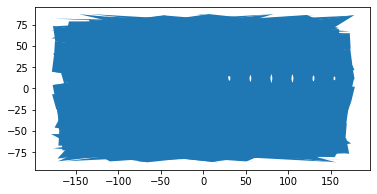

In [40]:
gdf.plot()

In [45]:
gdf.to_file(filename="saida.gpkg", driver='GPKG')

In [44]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}